<a href="https://colab.research.google.com/github/cssaivishnu/IR_Repo/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload that classifier model to the drive in the My Drive folder itself to avoid changing path in the code before running

Clone the github repo

In [1]:
!git clone --branch main https://github.com/cssaivishnu/IR_Repo.git

Cloning into 'IR_Repo'...
remote: Enumerating objects: 63810, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 63810 (delta 65), reused 71 (delta 37), pack-reused 63687
Receiving objects: 100% (63810/63810), 2.34 GiB | 24.20 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Updating files: 100% (76488/76488), done.


Import the essential libraries

In [2]:
import numpy as np
import os
import shutil
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms
from PIL import Image
import json
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

tf.random.set_seed(20)
random.seed = 20
np.random.seed = 20

Mount drive to access the classifier model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Make the main repo as the current active repository

In [4]:
os.chdir('/content/IR_Repo')
cwd = os.getcwd()
print(cwd)

/content/IR_Repo


In [5]:
def func(name):
    for i in range(len(name)):
        if name[i] == '&' or name[i] == '-':
            name = name[:i] + '_' + name[i+1:]
    return name

Create the label encodings mapping the product categories

In [6]:
dir_path = 'dataset'
i = 0
name_to_label = dict()
label_to_name = dict()
name_list = sorted(os.listdir(dir_path))

for name in name_list:
    if os.path.isdir(os.path.join(dir_path, name)):
        name = func(name)
        name_to_label[name] = i
        label_to_name[i] = name
        i = i + 1

Select 1 image from each of the product categories randomly

In [10]:
dir_path = 'dataset'
dataset = []
image_shape = (56, 56)
images = []

for name in name_list:
    if os.path.isdir(os.path.join(dir_path, name)):
        path = os.path.join(dir_path, name)
        # print(name_to_label[name])
        i = random.randint(0,99)
        for f in sorted(os.listdir(path), reverse=True):
            if os.path.isfile(os.path.join(path, f)):
                if i == 0:
                    img_path = os.path.join(path, f)
                    img = Image.open(img_path)
                    images.append(img)
                    img = img.resize(image_shape, Image.ANTIALIAS)
                    pixels = img.load()
                    lst = []
                    for i in range(img.size[0]):
                        lst1 = []
                        for j in range(img.size[1]):
                            lst1.append(list(pixels[i, j]))
                        lst.append(lst1)
                    lst = np.array(lst)
                    tupl = (lst,name_to_label[func(name)])
                    dataset.append(tupl)
                    break
                i = i - 1

Create features(X) and labels(y) from the dataset

In [11]:
X = []
y = []

for tupl in dataset:
    x, yy = tupl
    X.append(x)
    y.append(yy)
X = np.array(X)
y = np.array(y).reshape(22,1)

Initialisation

In [12]:
input_shape = (56, 56, 3)
num_categories = len(name_list)

Load the model uploaded to the session and get the prediction probabilities

In [14]:
classifier = keras.models.load_model('/content/drive/MyDrive/classifier.h5')
y_pred = classifier.predict(X)

1/1 [==============================] - 2s 2s/step


In [15]:
y = y.reshape(22)
y_p = []
for pred in y_pred:
    y_p.append(np.argmax(pred))
y_pred = np.array(y_p)

In [19]:
ac = accuracy_score(y, y_pred)

In [23]:
print(f'Accuracy: {round(ac*100,2)}%')
cnt = list(y-y_pred).count(0)
print(f'{cnt} out of 22 product categories were predicted correctly')

Accuracy: 72.73%
16 out of 22 product categories were predicted correctly


Initialisation

In [34]:
i = 0

Repeat this codeblock for 22 times to observe the predictions of the model for the 22 product categories

Actual Product Category:  Men_Western_Wear_Sweatshirts_Hoodies
Predicted Product Category:  Men_Western_Wear_Sweatshirts_Hoodies


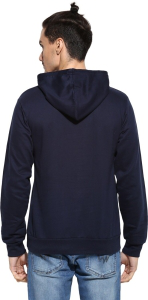

In [44]:
print('Actual Product Category: ', label_to_name[y[i]])
print('Predicted Product Category: ', label_to_name[y_pred[i]])
images[i].show()
i = i + 1